In [21]:
import csv 
import pandas as pd
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.corpus import stopwords
from textblob import TextBlob
!pip install wordcloud #this is the module
from wordcloud import WordCloud #we need the function; we dont need the whole module 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import warnings
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA

# download required NLTK packages
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


# read the csv file into a pandas dataframe
bumble_df = pd.read_csv('Bumble Posts.csv')

# print the first 5 rows of the dataframe
print(bumble_df.head())

 

   Unnamed: 0      id                                               url  \
0           0  myawjw  https://www.reddit.com/r/Bumble/comments/myawjw/   
1           1  myawjw  https://www.reddit.com/r/Bumble/comments/myawjw/   
2           2  myawjw  https://www.reddit.com/r/Bumble/comments/myawjw/   
3           3  myawjw  https://www.reddit.com/r/Bumble/comments/myawjw/   
4           4  myawjw  https://www.reddit.com/r/Bumble/comments/myawjw/   

                                            comments  
0  Now you have to invite all of us to your wedding.  
1                      Cut the crap and ask her out.  
2  Because I had such A large impact on this unio...  
3  Let me know where you guys register. I’ll send...  
4  It was 5th text when I realised he fucked up.\...  


[nltk_data] Downloading package punkt to /Users/palashis/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/palashis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/palashis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
comments = bumble_df['comments']

# define function to preprocess text
def preprocess_text(comments):
    # remove certain punctuation marks
    for char in ['!', '?', '@', '\'' , '/' , '.', ',','’']:
        comments = comments.replace(char, '')
    # remove remaining punctuation and convert to lower case
    comments = comments.translate(str.maketrans('', '', string.punctuation)).lower()
    return comments

# apply the preprocess_text function to the 'comments' column of the dataframe
bumble_df['comments'] = bumble_df['comments'].apply(preprocess_text)
print (bumble_df)


       Unnamed: 0      id                                               url  \
0               0  myawjw  https://www.reddit.com/r/Bumble/comments/myawjw/   
1               1  myawjw  https://www.reddit.com/r/Bumble/comments/myawjw/   
2               2  myawjw  https://www.reddit.com/r/Bumble/comments/myawjw/   
3               3  myawjw  https://www.reddit.com/r/Bumble/comments/myawjw/   
4               4  myawjw  https://www.reddit.com/r/Bumble/comments/myawjw/   
...           ...     ...                                               ...   
30797       30797  ictrcm  https://www.reddit.com/r/Bumble/comments/ictrcm/   
30798       30798  ictrcm  https://www.reddit.com/r/Bumble/comments/ictrcm/   
30799       30799  ictrcm  https://www.reddit.com/r/Bumble/comments/ictrcm/   
30800       30800  ictrcm  https://www.reddit.com/r/Bumble/comments/ictrcm/   
30801       30801  ictrcm  https://www.reddit.com/r/Bumble/comments/ictrcm/   

                                                com

In [23]:
comments = bumble_df['comments']
# define function to tokenize, lemmatize, and stem text
def process_text(comments):
    # tokenize text into individual words
    tokens = word_tokenize(comments)

    # remove stop words
    stop_words = set(stopwords.words('english')).union(['guy', 'date', 'would', 'guys','women','woman', 'fucking', 'fuck','know', 'people', 'think', 'like','youve','dont','yeah','shouldve','ill','this', 'is', 'the', 'to', 'on','be','that','im','am','I','thats','you','youre'])
    tokens = [word for word in tokens if word.lower() not in stop_words]

    return tokens

# apply the process_text function to each comment in the comments DataFrame
bumble_df['comments'] = bumble_df['comments'].apply(process_text)
print (bumble_df)


       Unnamed: 0      id                                               url  \
0               0  myawjw  https://www.reddit.com/r/Bumble/comments/myawjw/   
1               1  myawjw  https://www.reddit.com/r/Bumble/comments/myawjw/   
2               2  myawjw  https://www.reddit.com/r/Bumble/comments/myawjw/   
3               3  myawjw  https://www.reddit.com/r/Bumble/comments/myawjw/   
4               4  myawjw  https://www.reddit.com/r/Bumble/comments/myawjw/   
...           ...     ...                                               ...   
30797       30797  ictrcm  https://www.reddit.com/r/Bumble/comments/ictrcm/   
30798       30798  ictrcm  https://www.reddit.com/r/Bumble/comments/ictrcm/   
30799       30799  ictrcm  https://www.reddit.com/r/Bumble/comments/ictrcm/   
30800       30800  ictrcm  https://www.reddit.com/r/Bumble/comments/ictrcm/   
30801       30801  ictrcm  https://www.reddit.com/r/Bumble/comments/ictrcm/   

                                                com

In [24]:
bumble_df['comments'] = bumble_df['comments'].astype(str)

In [25]:
print (bumble_df)

       Unnamed: 0      id                                               url  \
0               0  myawjw  https://www.reddit.com/r/Bumble/comments/myawjw/   
1               1  myawjw  https://www.reddit.com/r/Bumble/comments/myawjw/   
2               2  myawjw  https://www.reddit.com/r/Bumble/comments/myawjw/   
3               3  myawjw  https://www.reddit.com/r/Bumble/comments/myawjw/   
4               4  myawjw  https://www.reddit.com/r/Bumble/comments/myawjw/   
...           ...     ...                                               ...   
30797       30797  ictrcm  https://www.reddit.com/r/Bumble/comments/ictrcm/   
30798       30798  ictrcm  https://www.reddit.com/r/Bumble/comments/ictrcm/   
30799       30799  ictrcm  https://www.reddit.com/r/Bumble/comments/ictrcm/   
30800       30800  ictrcm  https://www.reddit.com/r/Bumble/comments/ictrcm/   
30801       30801  ictrcm  https://www.reddit.com/r/Bumble/comments/ictrcm/   

                                                com

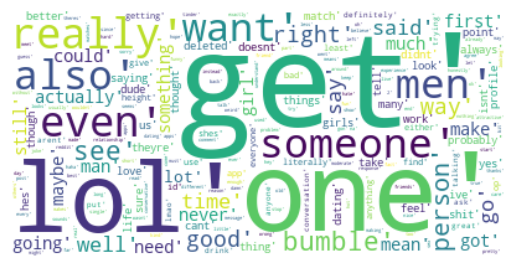

In [26]:


# define function to calculate polarity and subjectivity
def get_sentiment_scores(comments):
    blob = TextBlob(comments)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    return polarity, subjectivity

# apply the function to the 'comments' column of the dataframe
polarity, subjectivity = zip(*bumble_df['comments'].apply(get_sentiment_scores))

# add new columns to the dataframe for polarity and subjectivity scores
bumble_df['polarity'] = polarity
bumble_df['subjectivity'] = subjectivity

# generate wordcloud for comments
all_comments = ' '.join(bumble_df['comments'].tolist())
wordcloud = WordCloud(background_color='white').generate(all_comments)

# plot the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [27]:
print (bumble_df)

       Unnamed: 0      id                                               url  \
0               0  myawjw  https://www.reddit.com/r/Bumble/comments/myawjw/   
1               1  myawjw  https://www.reddit.com/r/Bumble/comments/myawjw/   
2               2  myawjw  https://www.reddit.com/r/Bumble/comments/myawjw/   
3               3  myawjw  https://www.reddit.com/r/Bumble/comments/myawjw/   
4               4  myawjw  https://www.reddit.com/r/Bumble/comments/myawjw/   
...           ...     ...                                               ...   
30797       30797  ictrcm  https://www.reddit.com/r/Bumble/comments/ictrcm/   
30798       30798  ictrcm  https://www.reddit.com/r/Bumble/comments/ictrcm/   
30799       30799  ictrcm  https://www.reddit.com/r/Bumble/comments/ictrcm/   
30800       30800  ictrcm  https://www.reddit.com/r/Bumble/comments/ictrcm/   
30801       30801  ictrcm  https://www.reddit.com/r/Bumble/comments/ictrcm/   

                                                com

## Top ten common words 

/Users/palashis/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



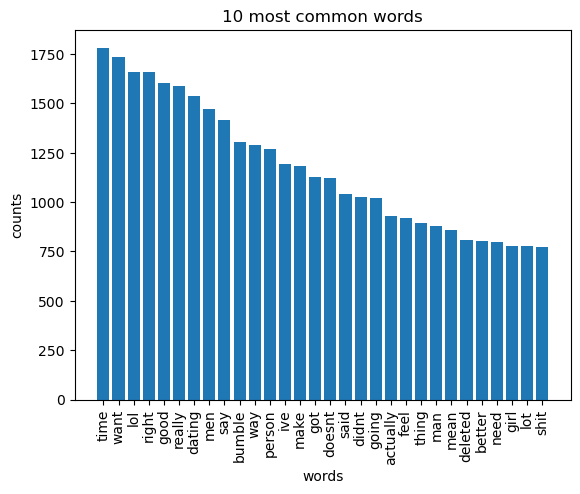

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
# create a CountVectorizer object
vectorizer = CountVectorizer()

#top ten common words 

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:30]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(bumble_df['comments'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [29]:
import warnings 
 
warnings.simplefilter("ignore", DeprecationWarning)

# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 5
number_words = 15

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)



Topics found via LDA:

Topic #0:
right left want time moderate men going conservative doesnt things party politics mean political way

Topic #1:
lol men profile say right said matches dating yes really swipe make app girl removed

Topic #2:
bumble good got ive tinder lmao time man best lol red haha hey nice damn

Topic #3:
deleted want dating time na message feel match didnt ive gon friend say need man

Topic #4:
really person doesnt hes height dude drink way good lol love dating make men feel


/Users/palashis/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [16]:
def top_n_trigram(corpus): #defining the triagram functions 
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus) #want three words (3 words that go together)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

In [17]:
dict_trigrams_bumble= {} #take pros and cons from data and see what happens there 
dict_trigrams_bumble = top_n_trigram(bumble_df['comments'])
#dict_trigrams_cons = top_n_trigram(df['cleancons'])

In [19]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from textblob import TextBlob
def bar_plot_toptrigrams(trigrams, reviewtype = 'Bumble'):
    common_words = trigrams[:10]
    df1 = pd.DataFrame(common_words, columns = ['word' , 'count'])
    fig = px.bar(df1, x='word', y='count')
    fig.update_layout(title_text= '{0} Review Tri-gram count top 20'.format(reviewtype), template="plotly_white")
    fig.show()

bar_plot_toptrigrams(dict_trigrams_bumble)
